In [1]:
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt
 
def read_images(left_image_path, right_image_path):
    # Read images in grayscale mode
    left_image = cv2.imread(left_image_path, 0)
    right_image = cv2.imread(right_image_path, 0)
    return left_image, right_image
 
def ncc(left_block, right_block):
    # Calculate the Normalized Cross-Correlation (NCC) between two blocks
    product = np.mean((left_block - left_block.mean()) * (right_block - right_block.mean()))
    stds = left_block.std() * right_block.std()
 
    if stds == 0:
        return 0
    else:
        return product / stds
 
def ssd(left_block, right_block):
    # Calculate the Sum of Squared Differences (SSD) between two blocks
    return np.sum(np.square(np.subtract(left_block, right_block)))
 
def sad(left_block, right_block):
    # Calculate the Sum of Absolute Differences (SAD) between two blocks
    return np.sum(np.abs(np.subtract(left_block, right_block)))
 
def select_similarity_function(method):
    # Select the similarity measure function based on the method name
    if method == 'ncc':
        return ncc
    elif method == 'ssd':
        return ssd
    elif method == 'sad':
        return sad
    else:
        raise ValueError("Unknown method")
 
def compute_disparity_map(left_image, right_image, block_size, disparity_range, method='ncc'):
    # Initialize disparity map
    height, width = left_image.shape
    disparity_map = np.zeros((height, width), np.uint8)
    half_block_size = block_size // 2
    similarity_function = select_similarity_function(method)
 
    # Loop over each pixel in the image
    for row in range(half_block_size, height - half_block_size):
        for col in range(half_block_size, width - half_block_size):
            best_disparity = 0
            best_similarity = float('inf') if method in ['ssd', 'sad'] else float('-inf')
 
            # Define one block for comparison based on the current pixel
            left_block = left_image[row - half_block_size:row + half_block_size + 1,
                                     col - half_block_size:col + half_block_size + 1]
 
            # Loop over different disparities
            for d in range(disparity_range):
                if col - d < half_block_size:
                    continue
 
                # Define the second block for comparison
                right_block = right_image[row - half_block_size:row + half_block_size + 1,
                                          col - d - half_block_size:col - d + half_block_size + 1]
 
                # Compute the similarity measure
                similarity = similarity_function(left_block, right_block)
 
                # Update the best similarity and disparity if necessary
                if method in ['ssd', 'sad']:
                    # For SSD and SAD, we are interested in the minimum value
                    if similarity < best_similarity:
                        best_similarity = similarity
                        best_disparity = d
                else:
                    # For NCC, we are interested in the maximum value
                    if similarity > best_similarity:
                        best_similarity = similarity
                        best_disparity = d
 
            # Assign the best disparity to the disparity map
            disparity_map[row, col] = best_disparity * (256. / disparity_range)
 
    return disparity_map
 
def main(method, block_size):
    # Define paths for input images
    left_image_path = 'pl.png'
    right_image_path = 'pr.png'
 
    # Load images
    left_image, right_image = read_images(left_image_path, right_image_path)
 
    # Record the start time
    tic_start = time.time()
 
    # Define the block size and disparity range
    #block_size = 15
    disparity_range = 64  # This can be adjusted based on your specific context
 
    # Specify the similarity measurement method ('ncc', 'ssd', or 'sad')
    #method = 'sad'  # Change this string to switch between methods
    print('Method:', method)
    # Compute the disparity map using the selected method
    disparity_map = compute_disparity_map(left_image, right_image, block_size, disparity_range, method=method)
    print('disparity_map')
    # Resize the disparity map for display
    scale_factor = 2.0  # Scaling the image by 3 times
    resized_image = cv2.resize(disparity_map, (0,0), fx=scale_factor, fy=scale_factor)
    print('resized_image')
    # Display the result
    #cv2.imshow('disparity_map_resized', resized_image)

    print('Time elapsed:', time.time() - tic_start)
    # Display the result
    plt.imshow(resized_image, cmap='gray')
    plt.title('Disparity Map')
    plt.axis('off')
    plt.show()
    # Wait for key press and close all windows
    
 


Method: sad
disparity_map
resized_image
Time elapsed: 81.75900268554688


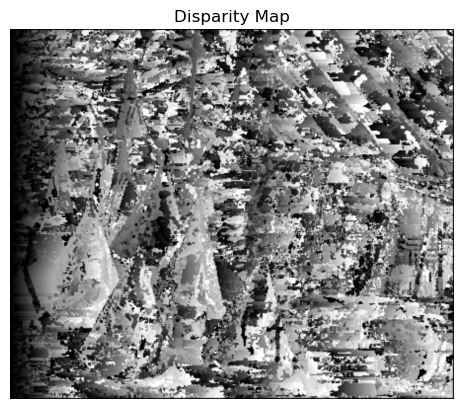

In [2]:
main('sad', 3)

Method: sad
disparity_map
resized_image
Time elapsed: 109.65692472457886


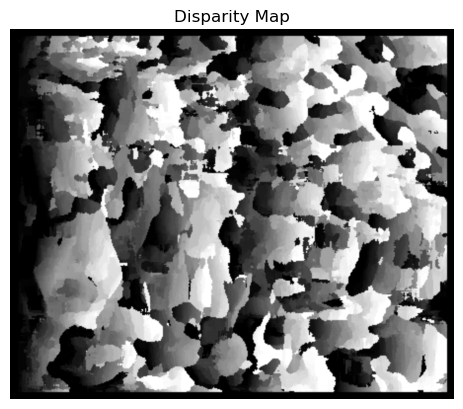

In [3]:
main('sad', 15)

Method: sad
disparity_map
resized_image
Time elapsed: 63.180747270584106


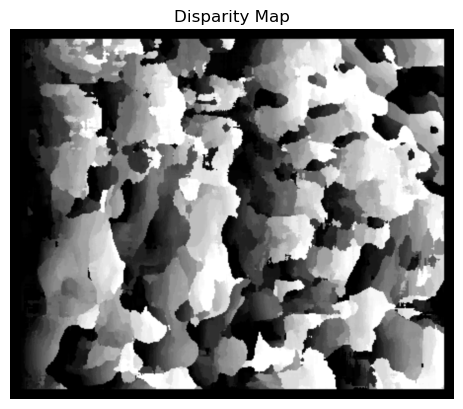

In [4]:
main('sad', 21)

Method: ssd
disparity_map
resized_image
Time elapsed: 55.433984994888306


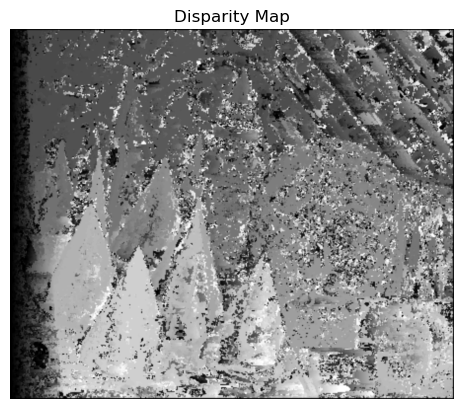

In [5]:
main('ssd', 3)

Method: ssd
disparity_map
resized_image
Time elapsed: 60.61998796463013


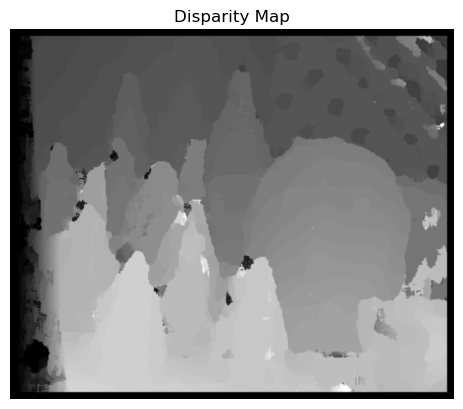

In [6]:
main('ssd', 15)

Method: ssd
disparity_map
resized_image
Time elapsed: 64.80561256408691


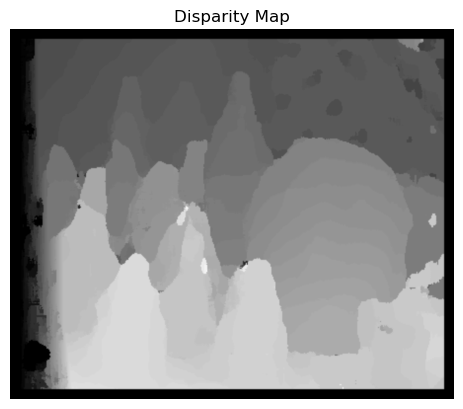

In [7]:
main('ssd', 21)

Method: ncc
disparity_map
resized_image
Time elapsed: 547.6187200546265


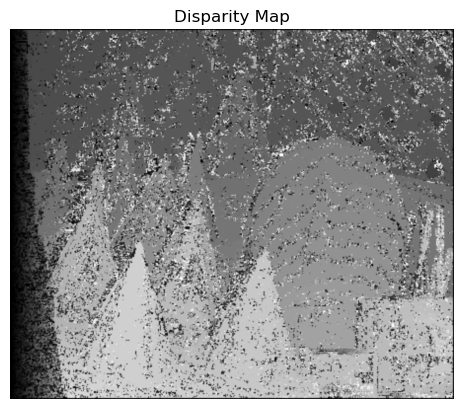

In [8]:
main('ncc', 3)

Method: ncc
disparity_map
resized_image
Time elapsed: 674.1156749725342


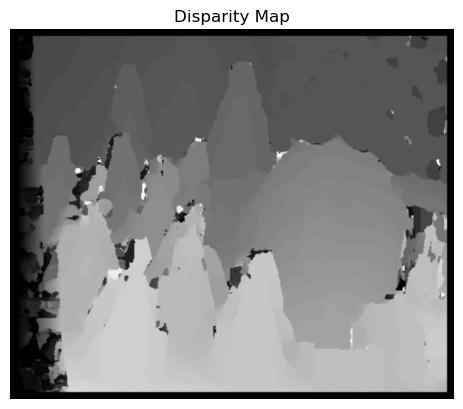

In [9]:
main('ncc', 15)

Method: ncc
disparity_map
resized_image
Time elapsed: 645.2516393661499


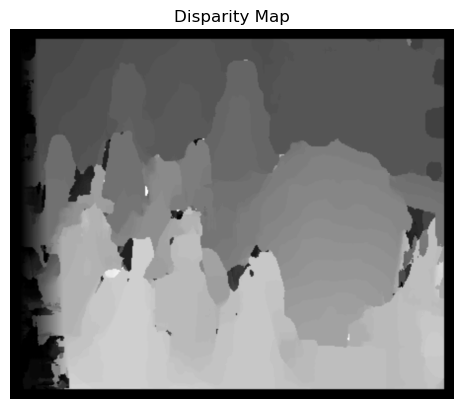

In [10]:
main('ncc', 21)